THINGS TO NOTE<br>
1. Imported dataset is called **DATA**
2. The dataset intended for use for post-processing tasks is called **df**

INITIAL MODULE IMPORT

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

DATA PREPROCESSING - IMPORT, DATA SIZE OVERVIEW

In [2]:
data = pd.read_csv('mentalhealth_dataset.csv') #Read dataset CSV
print(len(data))
print("----------")
print(data.dtypes) #View types f
print("----------")
print(data.describe()) #Describes the data in detail(count, means, standard deviations,...)
print("----------")



1000
----------
Timestamp                      object
Gender                         object
Age                             int64
Course                         object
YearOfStudy                    object
CGPA                          float64
Depression                      int64
Anxiety                         int64
PanicAttack                     int64
SpecialistTreatment             int64
SymptomFrequency_Last7Days      int64
HasMentalHealthSupport          int64
SleepQuality                    int64
StudyStressLevel                int64
StudyHoursPerWeek               int64
AcademicEngagement              int64
dtype: object
----------
               Age         CGPA   Depression      Anxiety  PanicAttack  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean     21.402000     3.122530     0.483000     0.474000     0.458000   
std       2.373611     0.810961     0.499961     0.499573     0.498482   
min      18.000000     2.000000     0.000000     0.0000

DATA PREPROCESSING - HANDLING POTENTIALLY MISSING DATA

In [3]:
print(data.isnull().sum())

Timestamp                     0
Gender                        0
Age                           0
Course                        0
YearOfStudy                   0
CGPA                          0
Depression                    0
Anxiety                       0
PanicAttack                   0
SpecialistTreatment           0
SymptomFrequency_Last7Days    0
HasMentalHealthSupport        0
SleepQuality                  0
StudyStressLevel              0
StudyHoursPerWeek             0
AcademicEngagement            0
dtype: int64


No missing data, filling null values not necessary.<br>

DATA PREPROCESSING - RENAMING COLUMNS

In [4]:
df = data

#Properly adding spaces and simplifying names
df.rename(columns={'HasMentalHealthSupport' : 'Mental Support'},inplace=True) 
df.rename(columns={'StudyHoursPerWeek':'StudyHour/Week'},inplace=True)
df.rename(columns={'PanicAttack' : 'Panic Attack'},inplace=True)
df.rename(columns={'SpecialistTreatment' : 'Specialist Treatment'},inplace=True)
df.rename(columns={'SymptomFrequency_Last7Days' : 'Symptom Frequency'},inplace=True)
df.rename(columns={'SleepQuality' : 'Sleep Quality'},inplace=True)
df.rename(columns={'StudyStressLevel' : 'Study Stress Level'},inplace=True)
df.rename(columns={'AcademicEngagement' : 'Academic Engagement'},inplace=True)

#Replace "year 1" in YearOfStudy column to "Year 1"
df["YearOfStudy"] = df['YearOfStudy'].replace('year 1','Year 1')
df["YearOfStudy"] = df['YearOfStudy'].replace('year 2','Year 2')
df["YearOfStudy"] = df['YearOfStudy'].replace('year 3','Year 3')
df["YearOfStudy"] = df['YearOfStudy'].replace('year 4','Year 4')
df.head()

,Timestamp,Gender,Age,Course,YearOfStudy,CGPA,Depression,Anxiety,Panic Attack,Specialist Treatment,Symptom Frequency,Mental Support,Sleep Quality,Study Stress Level,StudyHour/Week,Academic Engagement
0,13/7/2020,Female,24,Biotechnology,Year 3,2.38,1,0,0,0,5,0,4,5,8,2
1,13/7/2020,Female,18,Biotechnology,Year 3,4.00,0,1,0,0,0,0,4,4,13,5
2,13/7/2020,Female,25,Biotechnology,Year 3,3.68,0,0,1,0,3,0,1,2,13,1
3,13/7/2020,Female,18,Engineering,Year 4,4.00,0,0,0,0,3,0,5,1,19,2
4,13/7/2020,Female,20,Engineering,Year 4,2.00,1,1,0,0,0,0,2,4,3,2


DATA PREPROCESSING COMPLETE

<span style="font-size: 24px;">EXPLORATORY DATA ANALYSIS (EDA) PHASE - Noor Hannan Bin Noor Hamsuruddin(1211104293)</span>

PART 1 - View data in bar plots

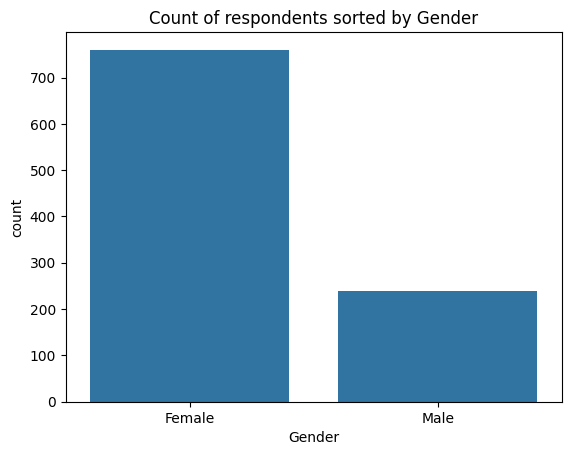

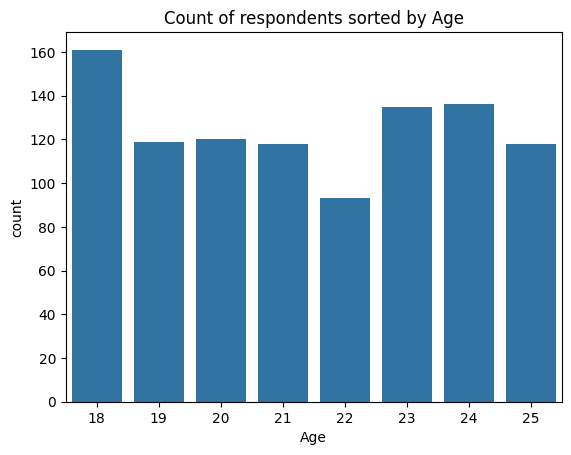

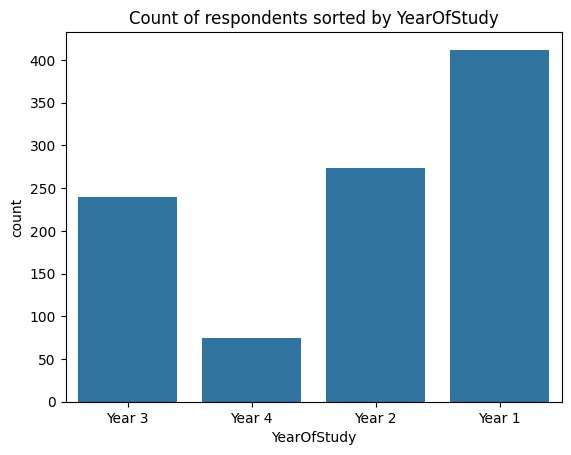

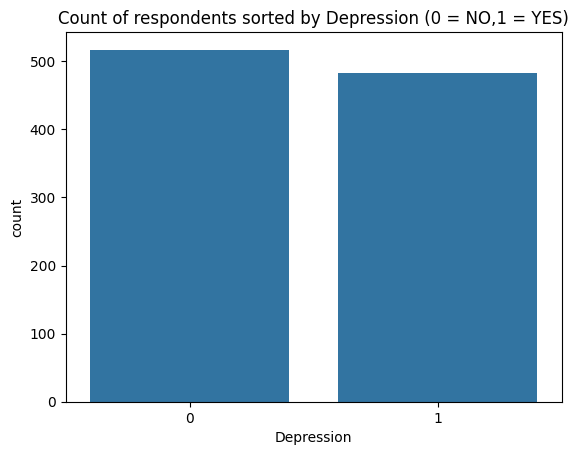

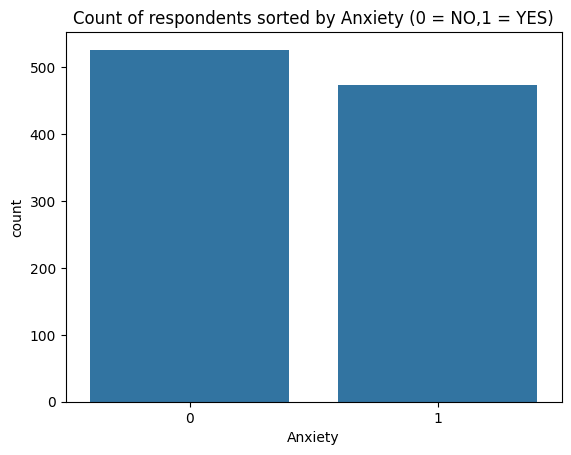

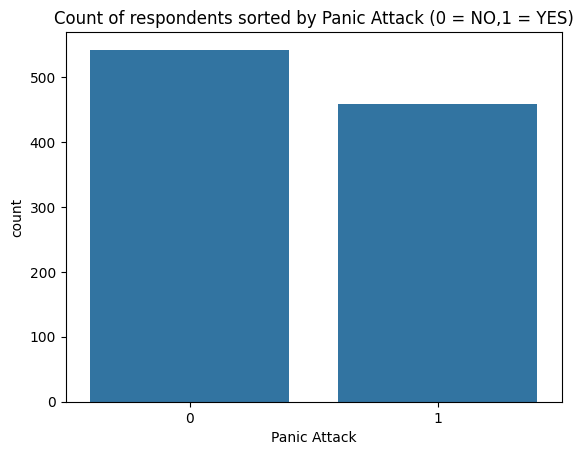

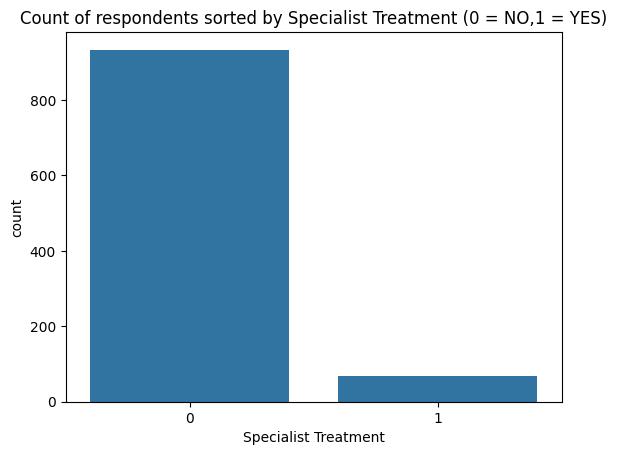

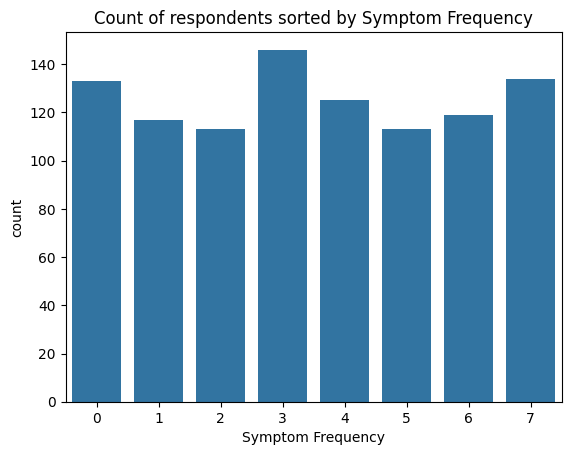

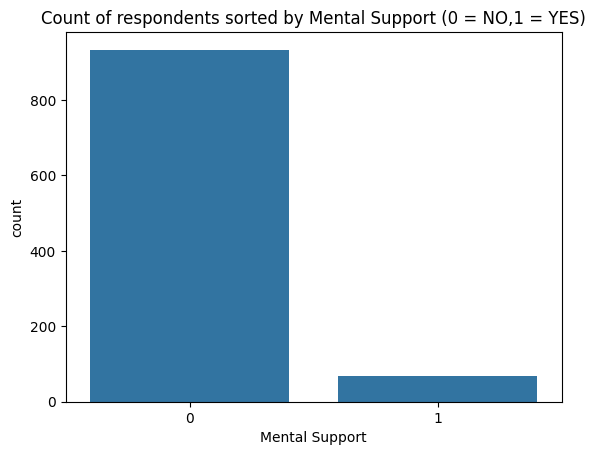

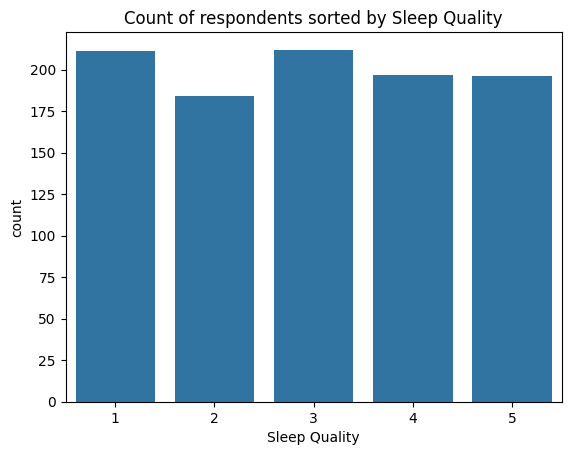

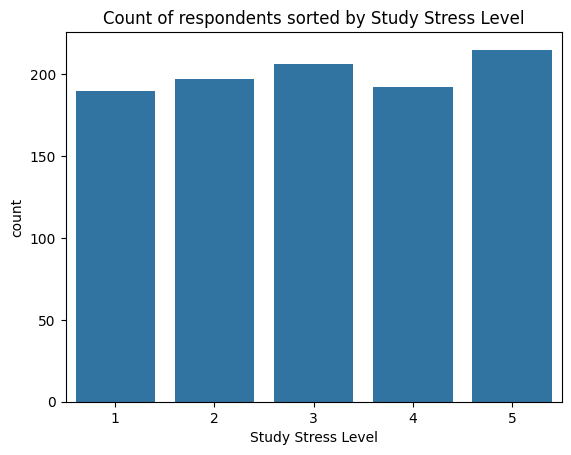

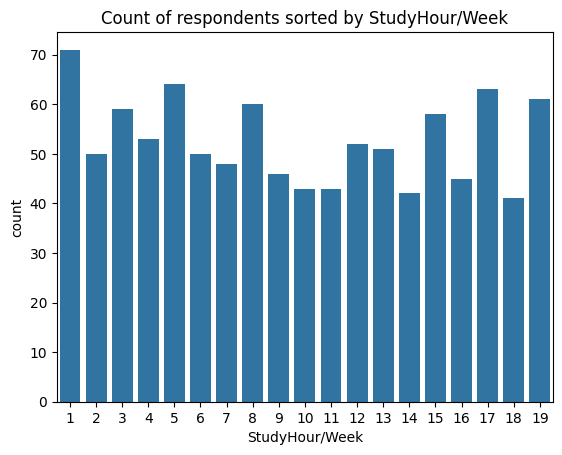

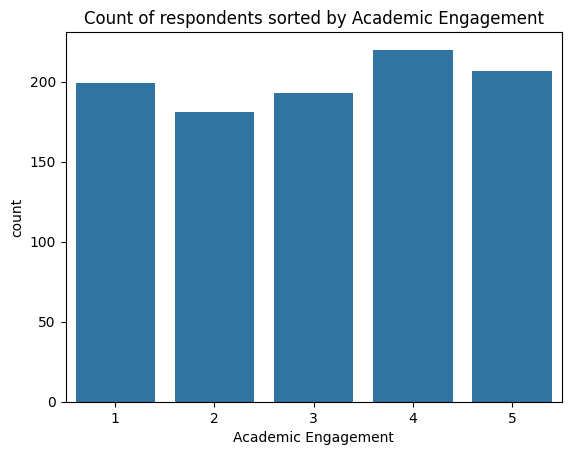

In [5]:
#Show count plots of numeric data
columns = df.columns.tolist()
columns_to_remove = ['Timestamp', 'CGPA','Course'] 
for col in columns_to_remove: 
    if col in columns:
        columns.remove(col)

for i in columns:
    sns.countplot(x=i,data=df)
    if(df[i].isin([0,1]).all()):
        plt.title(f"Count of respondents sorted by {i} (0 = NO,1 = YES)")
    else:
        plt.title(f"Count of respondents sorted by {i}")
    plt.show()

In [6]:
#Count number of students courses, since using a bar graph is unsuitable
course_count = df['Course'].value_counts()
print (course_count)

Course
Engineering                180
BCS                        177
BIT                        101
KOE                         39
Biomedical science          33
Engine                      19
Laws                        19
psychology                  17
BENL                        16
CTS                         15
Business Administration     14
Koe                         14
engin                       14
Human Sciences              13
Nursing                     13
Law                         13
Communication               13
Marine science              12
Psychology                  12
Kirkhs                      12
Malcom                      12
Pendidikan Islam            12
Accounting                  11
DIPLOMA TESL                11
Usuluddin                   11
Fiqh                        11
KIRKHS                      10
Irkhs                       10
Pendidikan islam            10
ENM                          9
Human Resources              9
Mathemathics                 9
F

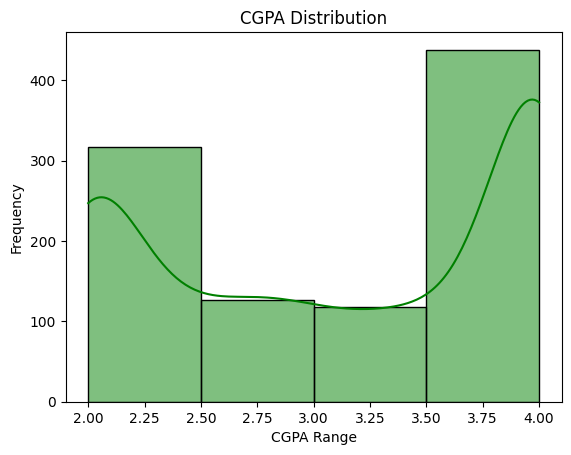

In [7]:
#Divide CGPA's into bins
sns.histplot(df["CGPA"], bins=4, kde=True,color='green')
plt.title("CGPA Distribution")
plt.xlabel("CGPA Range")
plt.ylabel("Frequency")
plt.show()


CHECKING POTENTIAL RELATED COLUMNS

A. Stress Levels against Course

In [17]:
#Check average stress levels for each course(Usage of weighted average to account for major differences in rows)
total_stress = df.groupby('Course')['Study Stress Level'].sum() 
total_counts = df.groupby('Course')['Study Stress Level'].count()

weighted_avg = total_stress / total_counts
weighted_avg = weighted_avg.sort_values(ascending=True)


for index, value in weighted_avg.items(): 
    print(f"{index} : {value:.2f}")
    

Islamic Education : 2.00
BENL : 2.12
Banking Studies : 2.17
Communication  : 2.46
Irkhs : 2.50
Fiqh fatwa  : 2.67
CTS : 2.67
ALA : 2.67
Law : 2.69
KENMS : 2.71
Koe : 2.79
engin : 2.86
koe : 2.88
Pendidikan islam : 2.90
KIRKHS : 2.90
Usuluddin  : 2.91
Biomedical science : 2.91
Accounting  : 2.91
Kirkhs : 2.92
Engineering : 2.92
Mathemathics : 3.00
MHSC : 3.00
KOE : 3.03
BCS : 3.05
Psychology : 3.08
Engine : 3.11
Human Resources : 3.11
Radiography : 3.11
TAASL : 3.11
IT : 3.12
Kop : 3.12
BIT : 3.15
Laws : 3.21
Pendidikan Islam : 3.29
Marine science : 3.33
psychology : 3.35
Fiqh : 3.36
Econs : 3.38
Human Sciences  : 3.46
Nursing  : 3.46
Pendidikan Islam  : 3.50
Business Administration : 3.50
DIPLOMA TESL : 3.55
Islamic education : 3.56
ENM : 3.56
Biotechnology : 3.62
Malcom : 3.83
Diploma Nursing : 3.88
Benl : 3.88


B. Depression Levels for each Year

Year 1 : 46.84% claim to be depressed
Year 2 : 45.62% claim to be depressed
Year 3 : 52.92% claim to be depressed
Year 4 : 51.35% claim to be depressed


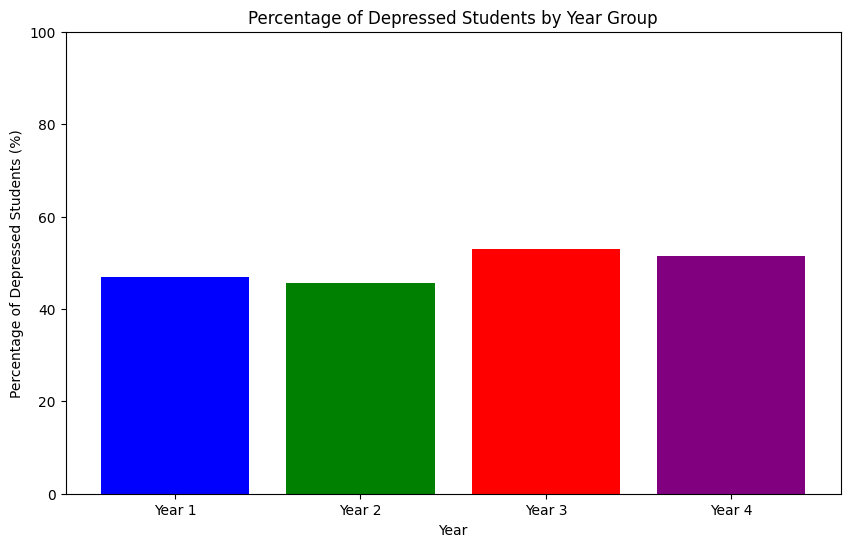

In [25]:
#Percentage of depressed respondents per year
depression_percentage = df.groupby('YearOfStudy')['Depression'].mean() *100

depression_percentage = depression_percentage.reset_index()

# Print the percentage of depressed students for each year
for index, row in depression_percentage.iterrows():
    print(f"{row['YearOfStudy']} : {row['Depression']:.2f}% claim to be depressed")

plt.figure(figsize=(10, 6))
plt.bar(depression_percentage['YearOfStudy'], depression_percentage['Depression'], color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Year')
plt.ylabel('Percentage of Depressed Students (%)')
plt.title('Percentage of Depressed Students by Year Group')
plt.ylim(0, 100)  # Set the y-axis limit to 0-100%
plt.show()


C. People in each year who have anxiety

Year 1 : 48.54% claim to be have anxiety
Year 2 : 47.08% claim to be have anxiety
Year 3 : 46.25% claim to be have anxiety
Year 4 : 45.95% claim to be have anxiety


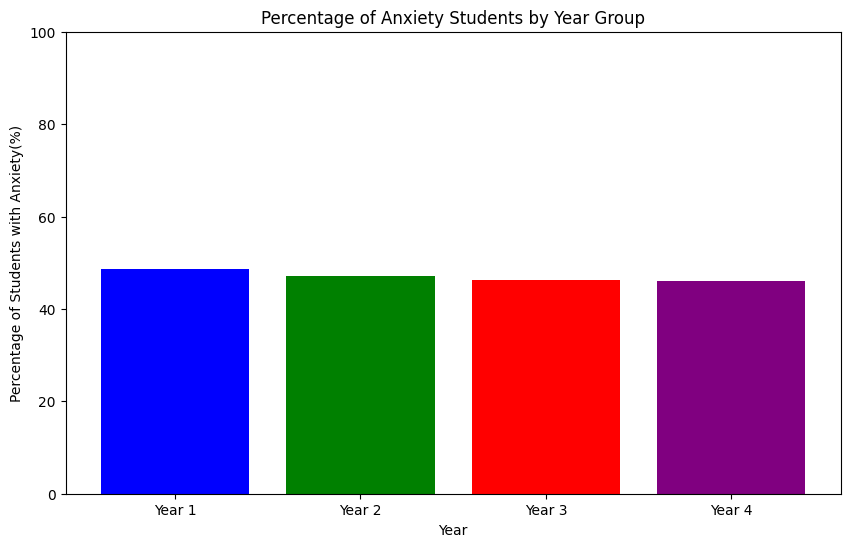

In [27]:
#Percentage of respondents per year who get anxiety
depression_percentage = df.groupby('YearOfStudy')['Anxiety'].mean() *100

depression_percentage = depression_percentage.reset_index()

# Print the percentage of depressed students for each year
for index, row in depression_percentage.iterrows():
    print(f"{row['YearOfStudy']} : {row['Anxiety']:.2f}% claim to be have anxiety")

plt.figure(figsize=(10, 6))
plt.bar(depression_percentage['YearOfStudy'], depression_percentage['Anxiety'], color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Year')
plt.ylabel('Percentage of Students with Anxiety(%)')
plt.title('Percentage of Anxiety Students by Year Group')
plt.ylim(0, 100)  # Set the y-axis limit to 0-100%
plt.show()

D. Students who have had panic attacks

Year 1 : 44.90% claim to be have anxiety
Year 2 : 45.99% claim to be have anxiety
Year 3 : 46.67% claim to be have anxiety
Year 4 : 47.30% claim to be have anxiety


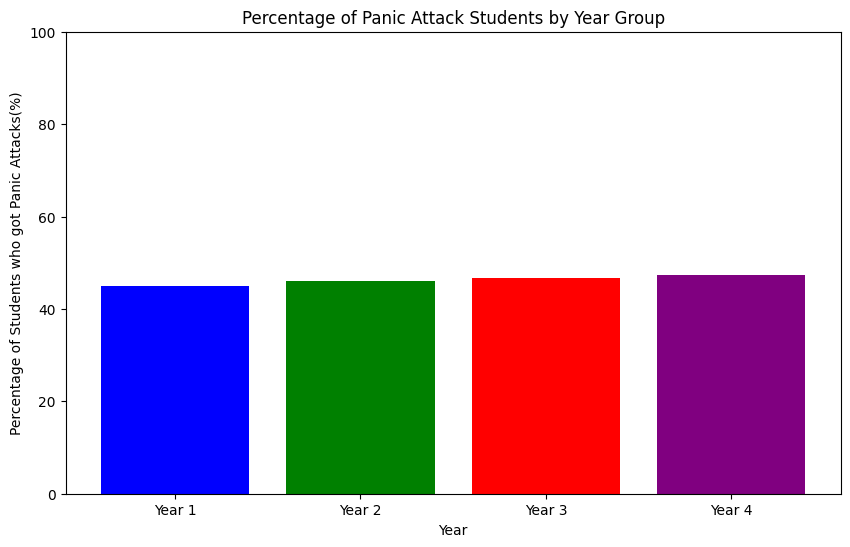

In [28]:
#Percentage of respondents per year who got panic attacks
depression_percentage = df.groupby('YearOfStudy')['Panic Attack'].mean() *100

depression_percentage = depression_percentage.reset_index()

# Print the percentage of depressed students for each year
for index, row in depression_percentage.iterrows():
    print(f"{row['YearOfStudy']} : {row['Panic Attack']:.2f}% claim to be have gotten panic attacks")

plt.figure(figsize=(10, 6))
plt.bar(depression_percentage['YearOfStudy'], depression_percentage['Panic Attack'], color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Year')
plt.ylabel('Percentage of Students who got Panic Attacks(%)')
plt.title('Percentage of Panic Attack Students by Year Group')
plt.ylim(0, 100)  # Set the y-axis limit to 0-100%
plt.show()

D. Correlations between columns

In [30]:
df[['Depression', 'Anxiety', 'Panic Attack']].corr()

,Depression,Anxiety,Panic Attack
Depression,1.000000,0.048325,-0.004876
Anxiety,0.048325,1.000000,0.027768
Panic Attack,-0.004876,0.027768,1.000000


E. Are depressed students getting the treatment or support they need?

6.21 % of students are getting treatment or mental support for their depression, leaving 93.79 % untreated or assisted.


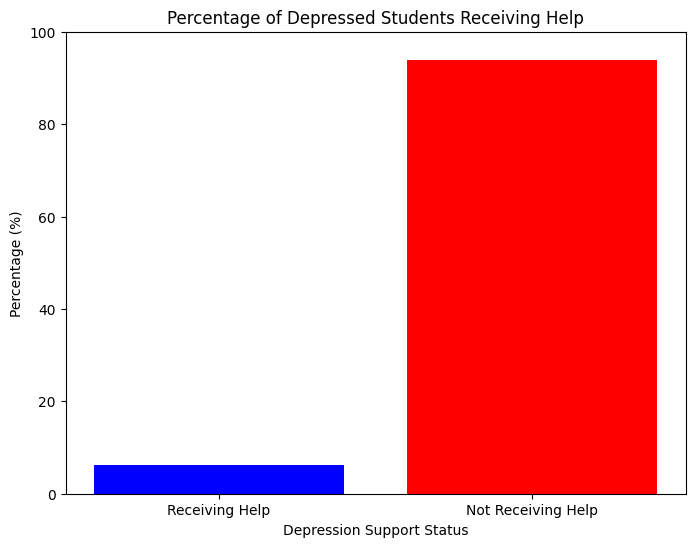

In [54]:
depressed = df[df['Depression'] == 1].copy()

depressed.loc[:, 'Receiving_Help'] = (depressed['Specialist Treatment'] == 1) | (depressed['Mental Support'] == 1)
getting_help = depressed['Receiving_Help'].sum()

total_depressed = len(depressed)

getting_help_percent = getting_help / total_depressed * 100
print(f'{getting_help_percent:.2f} % of students are getting treatment or mental support for their depression, leaving {100 - getting_help_percent:.2f} % untreated or assisted.')

labels = ['Receiving Help', 'Not Receiving Help']
percentages = [getting_help_percent, 100 - getting_help_percent]

plt.figure(figsize=(8, 6))
plt.bar(labels, percentages, color=['blue', 'red'])
plt.xlabel('Depression Support Status')
plt.ylabel('Percentage (%)')
plt.title('Percentage of Depressed Students Receiving Help')
plt.ylim(0, 100)  # Set the y-axis limit to 0-100%
plt.show()


F. Does leaving depression untreated cause a drop in academic engagement?

In [57]:
untreated = (df['Depression'] == 1) & ~((df['Specialist Treatment'] == 1) | (df['Mental Support'] == 1))

untreated_depressed = df[untreated]
mean_untreated_depressed = untreated_depressed['Academic Engagement'].mean()

engagement_normal = df[~(df['Depression']== 1) &((df['Specialist Treatment'] == 1) | (df['Mental Support'] == 1))]
mean_academic_engagement = engagement_normal['Academic Engagement'].mean()

print(f'Average Academic Engagement (Depressed): {mean_untreated_depressed:.2f}') 
print(f'Average Academic Engagement (Non-Depressed): {mean_academic_engagement:.2f}')



Average Academic Engagement (Depressed): 2.91
Average Academic Engagement (Non-Depressed): 3.22
